# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
import api_keys
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
today = pd.Timestamp("today").strftime("%m/%d/%Y")
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
city = 'honiara'

response = requests.get(query_url + city).json()
pprint.pprint(response)
{'base': 'stations',
'clouds': {'all': 75},
'cod': 200,
'coord': {'lat': -9.43, 'lon': 159.96},
'dt': 1539903600,
'id': 2108502,
'main': {'humidity': 70,
         'pressure': 1012,
         'temp': 87.8,
         'temp_max': 87.8,
         'temp_min': 87.8},
'name': 'Honiara',
'sys': {'country': 'SB',
        'id': 8147,
        'message': 0.0034,
        'sunrise': 1539802515,
        'sunset': 1539846916,
        'type': 1},
'visibility': 10000,
'weather': [{'description': 'haze', 'icon': '50n', 'id': 721, 'main': 'Haze'}],
'wind': {'deg': 110, 'speed': 11.41}}

#for city in cities:


# set up lists to hold reponse info
city_nm = []
lat = []
temp = []
humid = []
cloud = []
wind = []
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
#    print(f"Processing City Number: {query_url}{city}")
   response = requests.get(query_url + city).json()
#    print(f"{response['cod']}")
#cast response to type int
   valid = int(response['cod'])
#to check if there is a valid response for this city
   if valid == 200:
       city_nm.append(response['name'])
       lat.append(response['coord']['lat'])
       temp.append(response['main']['temp'])
       humid.append(response['main']['humidity'])
       cloud.append(response['clouds']['all'])
       wind.append(response['wind']['speed'])
       print(f"Processing City Number: {counter}: {response['name']}")
       counter = counter + 1

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -9.43, 'lon': 159.96},
 'dt': 1540346400,
 'id': 2108502,
 'main': {'humidity': 74,
          'pressure': 1007,
          'temp': 87.8,
          'temp_max': 87.8,
          'temp_min': 87.8},
 'name': 'Honiara',
 'sys': {'country': 'SB',
         'id': 8147,
         'message': 0.0036,
         'sunrise': 1540320787,
         'sunset': 1540365344,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 50, 'speed': 9.17}}
Processing City Number: 1: New Norfolk
Processing City Number: 2: Provideniya
Processing City Number: 3: Maloy
Processing City Number: 4: Nouakchott
Processing City Number: 5: Nara
Processing City Number: 6: Puerto Ayora
Processing City Number: 7: Guilin
Processing City Number: 8: Dalby
Processing City Number: 9: Butaritari
Processing City Number: 10: Alyangula
Processing City Number: 11: Madimba
Processing C

Processing City Number: 203: Cangzhou
Processing City Number: 204: Ilo
Processing City Number: 205: Sokoto
Processing City Number: 206: Airai
Processing City Number: 207: Innisfail
Processing City Number: 208: Borba
Processing City Number: 209: Clearlake
Processing City Number: 210: Saint George
Processing City Number: 211: Pathalgaon
Processing City Number: 212: Gamba
Processing City Number: 213: Mao
Processing City Number: 214: Valkeala
Processing City Number: 215: Caravelas
Processing City Number: 216: Broome
Processing City Number: 217: Nuevo Laredo
Processing City Number: 218: Batagay-Alyta
Processing City Number: 219: Namatanai
Processing City Number: 220: Odienne
Processing City Number: 221: Padang
Processing City Number: 222: Hovd
Processing City Number: 223: Marsala
Processing City Number: 224: Gat
Processing City Number: 225: Kahului
Processing City Number: 226: Jiexiu
Processing City Number: 227: Sioux Lookout
Processing City Number: 228: Santa Cruz de Tenerife
Processing Ci

Processing City Number: 417: Chuka
Processing City Number: 418: Tucumcari
Processing City Number: 419: Grass Valley
Processing City Number: 420: Soe
Processing City Number: 421: Buala
Processing City Number: 422: Aasiaat
Processing City Number: 423: Quatre Cocos
Processing City Number: 424: Matagami
Processing City Number: 425: Kondopoga
Processing City Number: 426: Redkino
Processing City Number: 427: Oussouye
Processing City Number: 428: Faya
Processing City Number: 429: Lagoa
Processing City Number: 430: Vardo
Processing City Number: 431: Chapais
Processing City Number: 432: Tigil
Processing City Number: 433: Hokitika
Processing City Number: 434: Cordoba
Processing City Number: 435: Kirkwood
Processing City Number: 436: Ribeira do Pombal
Processing City Number: 437: Aykhal
Processing City Number: 438: Sokur
Processing City Number: 439: Sukumo
Processing City Number: 440: Jian
Processing City Number: 441: Anadyr
Processing City Number: 442: Gadsden
Processing City Number: 443: Caorle

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# # create a data frame from cities, lat, and temp, humidity, cloudiness, and wind
weather_dict = {
   "city": city_nm,
   "lat": lat,
   "temp": temp,
   "humidity": humid,
   "cloudiness": cloud,
   "wind" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()
# pprint.pprint(response)

weather_data.to_csv(output_data_file, sep=',', encoding='utf-8')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

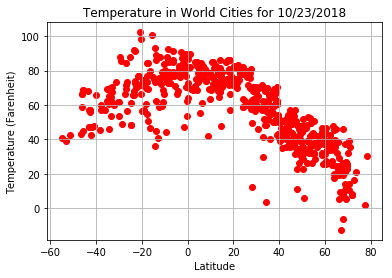

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", c = 'red')

# Incorporate the other graph properties
plt.title(f"Temperature in World Cities for {today}")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

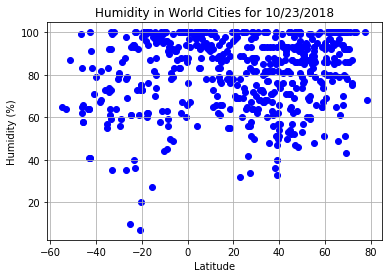

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", c="blue")

# Incorporate the other graph properties
plt.title(f"Humidity in World Cities for {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

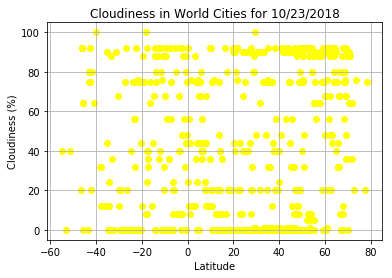

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", c="yellow")

# Incorporate the other graph properties
plt.title(f"Cloudiness in World Cities for {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

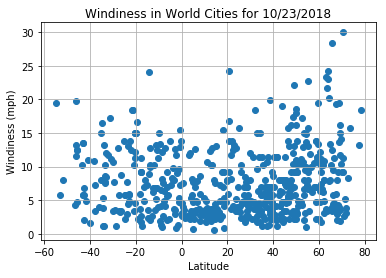

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title(f"Windiness in World Cities for {today}")
plt.ylabel("Windiness (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()